In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

file_path = '/content/drive/MyDrive/Colab Notebooks/Fiverr/vinaysuresh/exchange_rates.csv'

# 📙 1. Load data

In [39]:
dataset = pd.read_csv(file_path, parse_dates=['date'], index_col = 0)
dataset.head()

<ipython-input-39-2a461c0a688b>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dataset = pd.read_csv(file_path, parse_dates=['date'], index_col = 0)


,Country/Currency,currency,value,date
0,Australia Dollar,AUD,1.581627,2021-12-17
1,Great Britain Pound,GBP,0.851619,2021-12-17
2,Euro,EUR,1.000000,2021-12-17
3,Japan Yen,JPY,128.301759,2021-12-17
4,Switzerland Franc,CHF,1.041015,2021-12-17


In [40]:
# some insight about whole dataset
dataset.describe()

,value
count,107566.000000
mean,1684.882763
std,5539.146297
min,0.130975
25%,3.971411
50%,35.962212
75%,394.929290
max,51690.453353


# 📙 2. EDA on Currency data

## 2.1 First check if any null values present

In [41]:
dataset.isnull().sum()

Country/Currency    0
currency            0
value               0
date                0
dtype: int64

## 2.2 Types of Currency data present

In [71]:
unique_country = list(dataset['Country/Currency'].unique())
unique_currency = list(dataset['currency'].unique())
for x in range(len(unique_country)):
    print('Country name: {0} -> Currency: {1}'.format(unique_country[x], unique_currency[x]))

Country name: Australia Dollar -> Currency: AUD
Country name: Great Britain Pound -> Currency: GBP
Country name: Euro -> Currency: EUR
Country name: Japan Yen -> Currency: JPY
Country name: Switzerland Franc -> Currency: CHF
Country name: USA Dollar -> Currency: USD
Country name: Afghanistan Afghani -> Currency: AFN
Country name: Albania Lek -> Currency: ALL
Country name: Algeria Dinar -> Currency: DZD
Country name: Angola Kwanza -> Currency: AOA
Country name: Argentina Peso -> Currency: ARS
Country name: Armenia Dram -> Currency: AMD
Country name: Aruba Florin -> Currency: AWG
Country name: Azerbaijan New Manat -> Currency: AZN
Country name: Bahamas Dollar -> Currency: BSD
Country name: Bahrain Dinar -> Currency: BHD
Country name: Bangladesh Taka -> Currency: BDT
Country name: Barbados Dollar -> Currency: BBD
Country name: Belarus Ruble -> Currency: BYR
Country name: Belize Dollar -> Currency: BZD
Country name: Bermuda Dollar -> Currency: BMD
Country name: Bhutan Ngultrum -> Currency:

## 2.3 Pickup some country code for time series analysis

    1. USA Dollar -> USD
    2. India Rupee -> INR

In [45]:
data_usd = dataset.loc[dataset.currency == 'USD']
data_usd.head()

,Country/Currency,currency,value,date
5,USA Dollar,USD,1.132548,2021-12-17
155,USA Dollar,USD,1.123810,2021-12-18
305,USA Dollar,USD,1.123810,2021-12-19
455,USA Dollar,USD,1.124405,2021-12-20
605,USA Dollar,USD,1.128382,2021-12-21


## 2.4 Let's Visualize

In [46]:
from IPython.display import HTML, display

In [47]:
display_usd = HTML(
'''
<iframe src='https://flo.uri.sh/visualisation/11270785/embed' title='Interactive or visual content'
class='flourish-embed-iframe' frameborder='0' scrolling='no' style='width:100%;height:600px;'
    sandbox='allow-same-origin allow-forms allow-scripts allow-downloads allow-popups allow-popups-to-escape-sandbox allow-top-navigation-by-user-activation'></iframe>
    <div style='width:100%!;margin-top:4px!important;text-align:right!important;'>
    <a class='flourish-credit' href='https://public.flourish.studio/visualisation/11270785/?utm_source=embed&utm_campaign=visualisation/11270785' target='_top' style='text-decoration:none!important'>
    <img alt='Made with Flourish' src='https://public.flourish.studio/resources/made_with_flourish.svg' style='width:105px!important;height:16px!important;border:none!important;margin:0!important;'>
    </a></div>
'''
)

display_inr = HTML(
'''
<iframe src='https://flo.uri.sh/visualisation/11270830/embed' title='Interactive or visual content'
class='flourish-embed-iframe' frameborder='0' scrolling='no' style='width:100%;height:600px;'
    sandbox='allow-same-origin allow-forms allow-scripts allow-downloads allow-popups allow-popups-to-escape-sandbox allow-top-navigation-by-user-activation'></iframe>
    <div style='width:100%!;margin-top:4px!important;text-align:right!important;'>
    <a class='flourish-credit' href='https://public.flourish.studio/visualisation/11270830/?utm_source=embed&utm_campaign=visualisation/11270830' target='_top' style='text-decoration:none!important'>
    <img alt='Made with Flourish' src='https://public.flourish.studio/resources/made_with_flourish.svg' style='width:105px!important;height:16px!important;border:none!important;margin:0!important;'>
    </a></div>
'''
)

## 2.5 Visualize USD Value

In [48]:
display(display_usd)

In [72]:
data_inr = dataset.loc[dataset.currency == 'INR']
data_inr.tail()

,Country/Currency,currency,value,date
106887,India Rupee,INR,91.756744,2023-11-29
107036,India Rupee,INR,91.361145,2023-11-30
107185,India Rupee,INR,90.783141,2023-01-12
107334,India Rupee,INR,90.647364,2023-02-12
107483,India Rupee,INR,90.598021,2023-03-12


## 2.6 Visualize INR Value

In [50]:
display(display_inr)

# 📙 3. Time series Analysis - INR value

In [51]:
data_inr.index = data_inr['date']
data_inr.drop(['date', 'Country/Currency', 'currency'], axis = 1, inplace = True)
data_inr.head()


<ipython-input-51-f8bd2e1cd2bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_inr.drop(['date', 'Country/Currency', 'currency'], axis = 1, inplace = True)


,value
date,
2021-12-17,86.052225
2021-12-18,85.424708
2021-12-19,85.424708
2021-12-20,85.497443
2021-12-21,85.525694


## 3.1 Check for Stationarity - ADF Test

In [52]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data_inr['value'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -0.9212267795350163
p-value: 0.7809017904915436
Critial Values:
   1%, -3.439593802573824
Critial Values:
   5%, -2.865619356068967
Critial Values:
   10%, -2.568942332870462


## Obs -

    From ADF test, it's observed that, data is not stationary.
    We can see p-value is 30% (usually it must be less than 0.05 or 5%),
    and ADF-stat value is greater than all the critical values.
    
    Both these values confirms the data to be Non-Stationary

## 3.2 ACF and PACF Plot

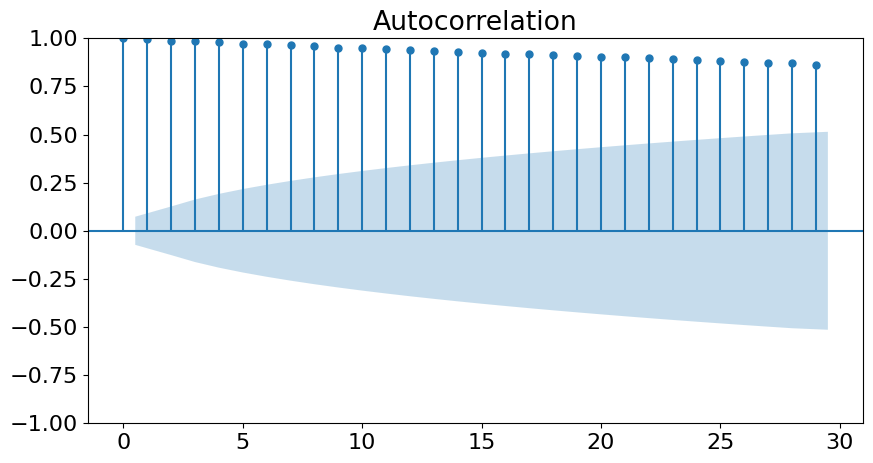

In [53]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

plt.rc("figure", figsize=(10,5))
plot_acf(data_inr['value'])
print()

## Obs -

    From ACF, we can observe a auto-correlation upto 25 lag values

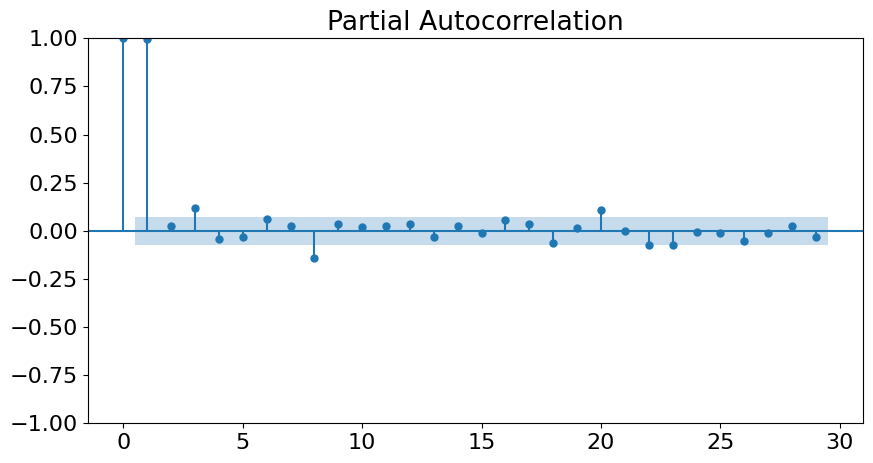

In [54]:
plt.rc("figure", figsize=(10,5))
plot_pacf(data_inr['value'])
print()

## Obs -

    Partial auto-correlation shows only few lag values are actually correlated.

# 📙 4. Price forecasting

## 4.1 Train - Test Split

In [55]:
data = data_inr['value'].values
print('Shape of data: ', data.shape)

Shape of data:  (718,)


## Obs -

    Very few data points are available, so we will go for either ARIMA or LSTM with fewer nodes.

In [56]:
# Separate train and test data
train_length = int(len(data) * 0.8)
print('Train length: ', train_length)

train_data, test_data = data[:train_length], data[train_length:]
print('Shape of Train and Test data: ', len(train_data), len(test_data))

Train length:  574
Shape of Train and Test data:  574 144


## 4.2 Make time-series data supervised

In [57]:
# split a univariate sequence into supervised learning [Input and Output]
from numpy import array
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

## 4.3 Choose Lag value

In [58]:
lag = 3  # Empirically we have choosen
n_features = 1

In [59]:
train_X, train_y = split_sequence(train_data, lag)
test_X, test_y = split_sequence(test_data, lag)

In [60]:
print('Shape of train_X and train_y: ', train_X.shape, train_y.shape)
print('Shape of test_X and test_y: ', test_X.shape, test_y.shape)

Shape of train_X and train_y:  (571, 3) (571,)
Shape of test_X and test_y:  (141, 3) (141,)


In [61]:
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features))

In [62]:
# New shape of train_X and test_X are :-
print('Shape of train_X and train_y: ', train_X.shape, train_y.shape)
print('Shape of test_X and test_y: ', test_X.shape, test_y.shape)


Shape of train_X and train_y:  (571, 3, 1) (571,)
Shape of test_X and test_y:  (141, 3, 1) (141,)


## 4.4 Define Model

In [63]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [64]:
# define model
model = Sequential()
model.add(LSTM(16, activation='relu', return_sequences=False, input_shape=(lag, n_features)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 16)                1152      
                                                                 
 dense_3 (Dense)             (None, 32)                544       
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1729 (6.75 KB)
Trainable params: 1729 (6.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 4.5 Fit the model - with training data

In [65]:
# As you are trying to use function decorator in TF 2.0,
# please enable run function eagerly by using below line after importing TensorFlow:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [66]:
# fit model
history = model.fit(train_X, train_y, epochs = 25, batch_size=8, verbose=1, validation_split= 0.1)

Epoch 1/25
 1/65 [..............................] - ETA: 3s - loss: 5573.6992

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


65/65 [==============================] - 4s 56ms/step - loss: 2756.1077 - val_loss: 398.6933
Epoch 2/25
65/65 [==============================] - 4s 61ms/step - loss: 31.3737 - val_loss: 0.1303
Epoch 3/25
65/65 [==============================] - 3s 42ms/step - loss: 0.2334 - val_loss: 0.1168
Epoch 4/25
65/65 [==============================] - 3s 41ms/step - loss: 0.2230 - val_loss: 0.1155
Epoch 5/25
65/65 [==============================] - 3s 41ms/step - loss: 0.2253 - val_loss: 0.1140
Epoch 6/25
65/65 [==============================] - 3s 47ms/step - loss: 0.2254 - val_loss: 0.1153
Epoch 7/25
65/65 [==============================] - 4s 59ms/step - loss: 0.2251 - val_loss: 0.1207
Epoch 8/25
65/65 [==============================] - 3s 49ms/step - loss: 0.2271 - val_loss: 0.1154
Epoch 9/25
65/65 [==============================] - 3s 41ms/step - loss: 0.2294 - val_loss: 0.1145
Epoch 10/25
65/65 [==============================] - 3s 41ms/step - loss: 0.2267 - val_loss: 0.1278
Epoch 11/25
65

## 4.6 Summarize model Loss

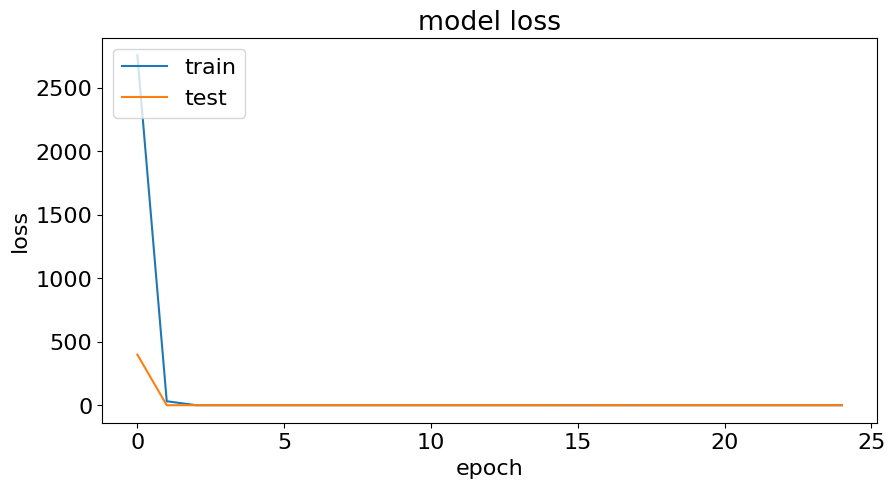

In [67]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 4.7 Make prediction - with Test data

In [68]:
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

print('Shape of train and test predict: ', train_predict.shape, test_predict.shape)

5/5 [==============================] - 0s 15ms/step
Shape of train and test predict:  (571, 1) (141, 1)


## 4.8 Model evaluation

In [69]:
# root mean squared error or rmse
import math
from sklearn.metrics import mean_squared_error

def measure_rmse(actual, predicted):
    return math.sqrt(mean_squared_error(actual, predicted))

train_score = measure_rmse(train_y, train_predict)
test_score = measure_rmse(test_y, test_predict)

print('Train and Test RMSE: ', train_score, test_score)

Train and Test RMSE:  0.4882730707914511 0.4220019435569799


## 4.9 Plot test data and Predicted data

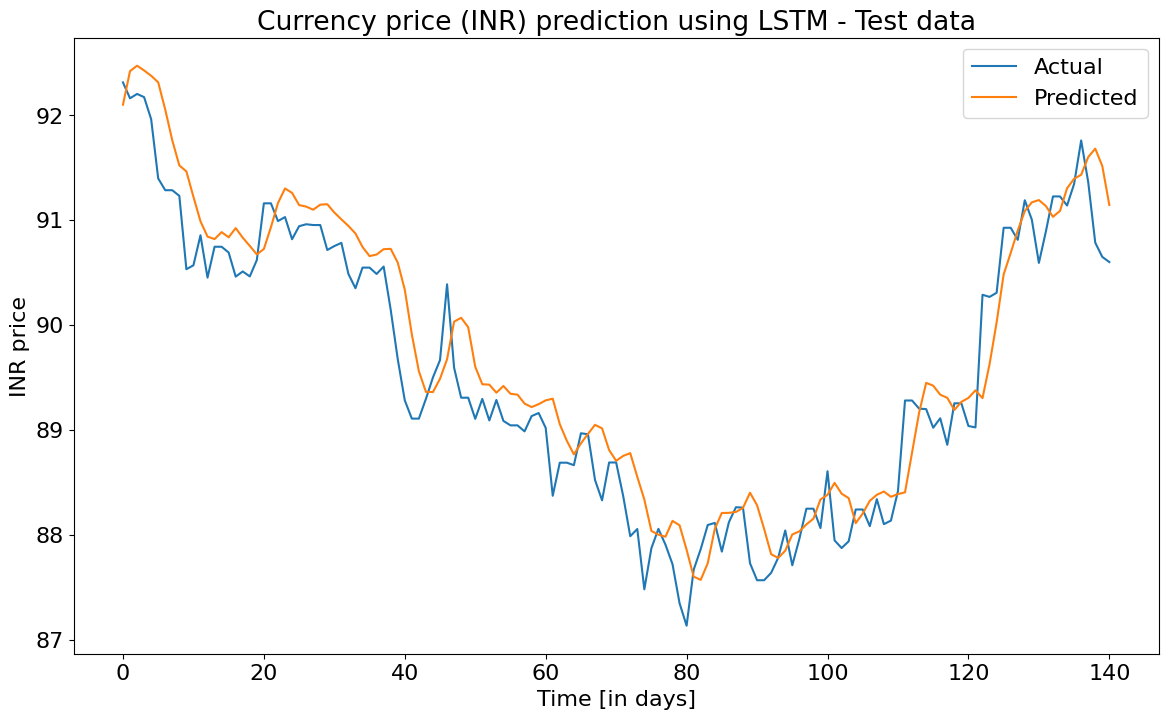

In [70]:
plt.rc("figure", figsize=(14,8))
plt.rcParams.update({'font.size': 16})
plt.plot(test_y, label = 'Actual')
plt.plot(test_predict, label = 'Predicted')
plt.xlabel('Time [in days]')
plt.ylabel('INR price')
plt.title('Currency price (INR) prediction using LSTM - Test data')
plt.legend()
plt.show()

## To be Continued ...

    